In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import mlutils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
%matplotlib inline

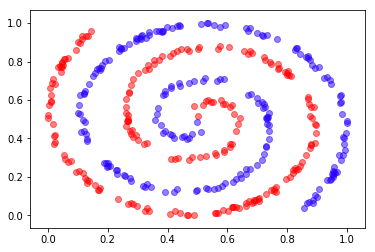

In [4]:
X,y = mlutils.twospirals(200)
mlutils.plot_2Ddata(X,y)

se convierte la salida esperada a variable categórica (**onehot encoding**)

In [5]:
yc = tf.keras.utils.to_categorical(y)

### obserca cómo se pueden añadir distintos tipos de transformaciones a X

**Cuadráticas**

In [6]:
Xt = np.hstack((X,X**2))
print (Xt.shape)
print (X[:2])
print (Xt[:2])

(400, 4)
[[0.83458323 0.23947527]
 [0.05316321 0.31554506]]
[[0.83458323 0.23947527 0.69652917 0.0573484 ]
 [0.05316321 0.31554506 0.00282633 0.09956869]]


**sin, cos**

In [7]:
Xt = np.hstack((X,np.sin(X), np.cos(X)))
print (Xt.shape)
print (X[:2])
print (Xt[:2])

(400, 6)
[[0.83458323 0.23947527]
 [0.05316321 0.31554506]]
[[0.83458323 0.23947527 0.74101672 0.2371929  0.67148657 0.97146257]
 [0.05316321 0.31554506 0.05313817 0.31033467 0.99858717 0.95062737]]


**recombinación de columnas**

In [8]:
Xt = np.hstack((X,X[:,[0]]*X[:,[1]]))
print (Xt.shape)
print (X[:2])
print (Xt[:2])

(400, 3)
[[0.83458323 0.23947527]
 [0.05316321 0.31554506]]
[[0.83458323 0.23947527 0.19986204]
 [0.05316321 0.31554506 0.01677539]]


## Creamos el modelo

In [9]:
def get_model(input_dim=2):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(6, activation='tanh', input_dim=input_dim))
    model.add(Dense(3, activation='tanh'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.reset_states()
    return model


**Observa como creamos una función para transformar los datos**

In [10]:
def transform_X(X):
    return np.hstack((X,X**2))

model = get_model(transform_X(X).shape[1])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


** haz el entrenamiento **

- prueba con distinto tamaño de batch
- quizá tengas que ir hasta 2000 o 3000 epochs o quizá más
- monitorea la evolución del desempeño
- puedes parar el entrenamiento (kernel->interrupt) y observar la clasificación
- si vuelves a ejecutar la celda con `fit` el entrenamiento seguirá desde donde estaba
- si vuelves a ejecutar la celda con `get_model` el entrenamiento se reinicializa

In [11]:
model.fit(transform_X(X), yc, epochs=4000, batch_size=16)

Instructions for updating:
Use tf.cast instead.
Epoch 1/4000
400/400 [==============================] - 0s 331us/sample - loss: 0.7216 - acc: 0.4700
Epoch 2/4000
400/400 [==============================] - 0s 87us/sample - loss: 0.7077 - acc: 0.4550
Epoch 3/4000
400/400 [==============================] - 0s 70us/sample - loss: 0.7030 - acc: 0.4400
Epoch 4/4000
400/400 [==============================] - 0s 88us/sample - loss: 0.7001 - acc: 0.4475
Epoch 5/4000
400/400 [==============================] - 0s 86us/sample - loss: 0.6981 - acc: 0.5275
Epoch 6/4000
400/400 [==============================] - 0s 83us/sample - loss: 0.6968 - acc: 0.4825
Epoch 7/4000
400/400 [==============================] - 0s 90us/sample - loss: 0.6957 - acc: 0.5225
Epoch 8/4000
400/400 [==============================] - 0s 94us/sample - loss: 0.6947 - acc: 0.5325
Epoch 9/4000
400/400 [==============================] - 0s 73us/sample - loss: 0.6931 - acc: 0.5375
Epoch 10/4000
400/400 [============================

Epoch 79/4000
400/400 [==============================] - 0s 66us/sample - loss: 0.6642 - acc: 0.6000
Epoch 80/4000
400/400 [==============================] - 0s 71us/sample - loss: 0.6645 - acc: 0.6025
Epoch 81/4000
400/400 [==============================] - 0s 76us/sample - loss: 0.6644 - acc: 0.6050
Epoch 82/4000
400/400 [==============================] - 0s 85us/sample - loss: 0.6644 - acc: 0.5975
Epoch 83/4000
400/400 [==============================] - 0s 87us/sample - loss: 0.6644 - acc: 0.6025
Epoch 84/4000
400/400 [==============================] - 0s 76us/sample - loss: 0.6642 - acc: 0.6000
Epoch 85/4000
400/400 [==============================] - 0s 78us/sample - loss: 0.6643 - acc: 0.5925
Epoch 86/4000
400/400 [==============================] - 0s 73us/sample - loss: 0.6640 - acc: 0.6025
Epoch 87/4000
400/400 [==============================] - 0s 73us/sample - loss: 0.6642 - acc: 0.6050
Epoch 88/4000
400/400 [==============================] - 0s 71us/sample - loss: 0.6644 - ac

400/400 [==============================] - 0s 85us/sample - loss: 0.6631 - acc: 0.6050
Epoch 160/4000
400/400 [==============================] - 0s 99us/sample - loss: 0.6634 - acc: 0.5975
Epoch 161/4000
400/400 [==============================] - 0s 88us/sample - loss: 0.6641 - acc: 0.5925
Epoch 162/4000
400/400 [==============================] - 0s 85us/sample - loss: 0.6630 - acc: 0.6075
Epoch 163/4000
400/400 [==============================] - 0s 90us/sample - loss: 0.6630 - acc: 0.6075
Epoch 164/4000
400/400 [==============================] - 0s 91us/sample - loss: 0.6628 - acc: 0.6050
Epoch 165/4000
400/400 [==============================] - 0s 101us/sample - loss: 0.6631 - acc: 0.6075
Epoch 166/4000
400/400 [==============================] - 0s 94us/sample - loss: 0.6627 - acc: 0.6075
Epoch 167/4000
400/400 [==============================] - 0s 95us/sample - loss: 0.6630 - acc: 0.5975
Epoch 168/4000
400/400 [==============================] - 0s 91us/sample - loss: 0.6632 - acc: 0

400/400 [==============================] - 0s 88us/sample - loss: 0.6606 - acc: 0.6075
Epoch 240/4000
400/400 [==============================] - 0s 92us/sample - loss: 0.6596 - acc: 0.6000
Epoch 241/4000
400/400 [==============================] - 0s 104us/sample - loss: 0.6598 - acc: 0.6025
Epoch 242/4000
400/400 [==============================] - 0s 93us/sample - loss: 0.6595 - acc: 0.5975
Epoch 243/4000
400/400 [==============================] - 0s 94us/sample - loss: 0.6602 - acc: 0.5900
Epoch 244/4000
400/400 [==============================] - 0s 100us/sample - loss: 0.6607 - acc: 0.5975
Epoch 245/4000
400/400 [==============================] - 0s 90us/sample - loss: 0.6593 - acc: 0.6000
Epoch 246/4000
400/400 [==============================] - 0s 95us/sample - loss: 0.6600 - acc: 0.5850
Epoch 247/4000
400/400 [==============================] - 0s 88us/sample - loss: 0.6591 - acc: 0.6000
Epoch 248/4000
400/400 [==============================] - 0s 91us/sample - loss: 0.6593 - acc: 

KeyboardInterrupt: 

In [243]:
model.predict(transform_X(X[:2]))

array([[9.9948359e-01, 5.1641080e-04],
       [9.9705875e-01, 2.9412825e-03]], dtype=float32)

(0.6274, 0.3726)

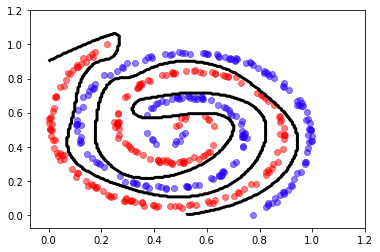

In [253]:
reload(mlutils)
def predict(Xpred):
    preds = model.predict(transform_X(Xpred))
    return (preds[:,0]>preds[:,1]).astype(int)

mlutils.plot_2Ddata_with_boundary(predict, X,y)